##### Among all industries, the insurance domain has one of the largest uses of analytics & data science methods. This dataset provides you a taste of working on data sets from insurance companies – what challenges are faced there, what strategies are used, which variables influence the outcome, etc. This is a classification problem. The data has 615 rows and 13 columns.

**Problem: Predict if a loan will get approved or not.**

We are going to work on binary classification problem, where we got some information about sample of peoples , and we need to predict whether we should give some one a loan or not depending on his information . we actually have a few sample size (614 rows), so we will go with machine learning techniques to solve our problem .

## The Dataset
In the Dataset we find the following variables:
- Loan ID, the identifier code of each applicant.
- Gender, Male or Female for each applicant.
- Married, the maritage state.
- Dependents, how many dependents does the applicant have?
- Education, the level of education, graduate or non graduate
- Self Employed, Yes or No in the case
- Applicant Income
- Coapplicant Income
- Loan Amount
- Loan Amount Term
- Credit History, just Yes or No in the case
- Property Area, urban, semiurban or rural area of the applicant’s property
- Loan Status, Yes or No ( The independent Variable)

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')

Let's analyse our data with pandas profiling first

In [3]:
!pip install pandas_profiling

In [4]:
from pandas_profiling import ProfileReport

In [5]:
design_report = ProfileReport(df)
design_report.to_file(output_file='report.html')

In [6]:
design_report

In [7]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [8]:
df.shape

(614, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We have missing data , we will handle them as we go

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


It seems that credit history is 1 or 0. So let's change it to binary

In [11]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [12]:
df['Credit_History'] = df['Credit_History'].astype('O')

In [13]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001692,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


We will drop ID because it's not important for our model

In [14]:
df.drop('Loan_ID',axis=1,inplace=True)

##### Do we have any duplicate ?

In [15]:
df.duplicated().any()

False

We got no duplicated rows

#### Let's look at our target

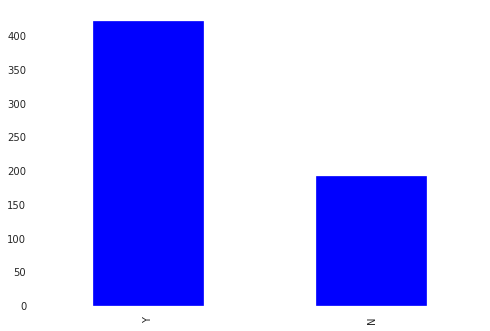

In [16]:
df.Loan_Status.value_counts().plot.bar(color='blue')

The percentage of Y class : 0.69
The percentage of N class : 0.31


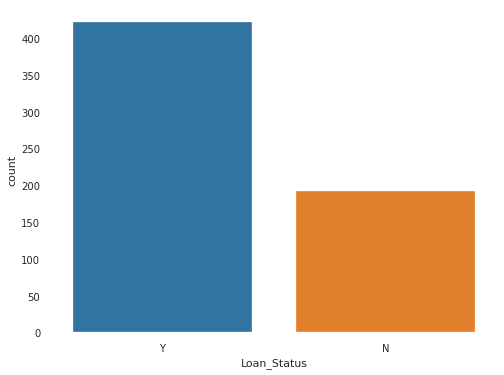

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);

print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

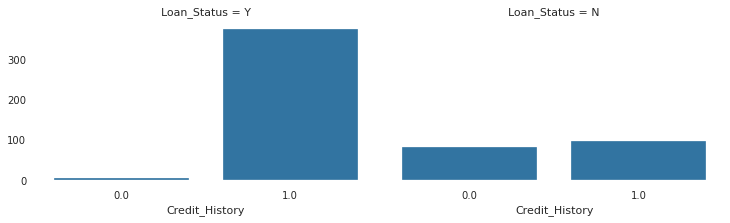

In [18]:
# Credit_History

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

# we didn't give a loan for most people who got Credit History = 0
# but we did give a loan for most of people who got Credit History = 1
# so we can say if you got Credit History = 1 , you will have better chance to get a loan

# important feature

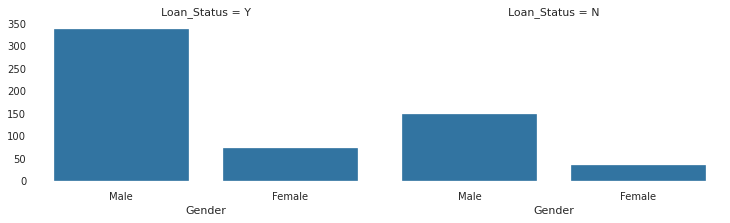

In [19]:
# Gender

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender');

# most males got loan and most females got one too so (No pattern)

# i think it's not so important feature, we will see later

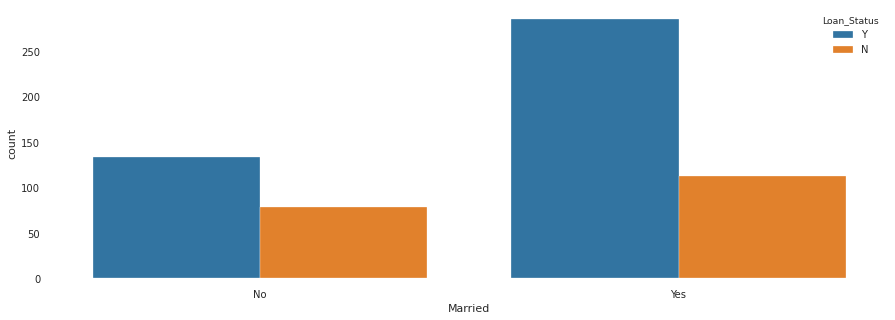

In [20]:
# Married
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=df);

# most people who get married did get a loan
# if you'r married then you have better chance to get a loan :)
# good feature

Before analyse the dependents columns let's analyse the different value inside.

In [21]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

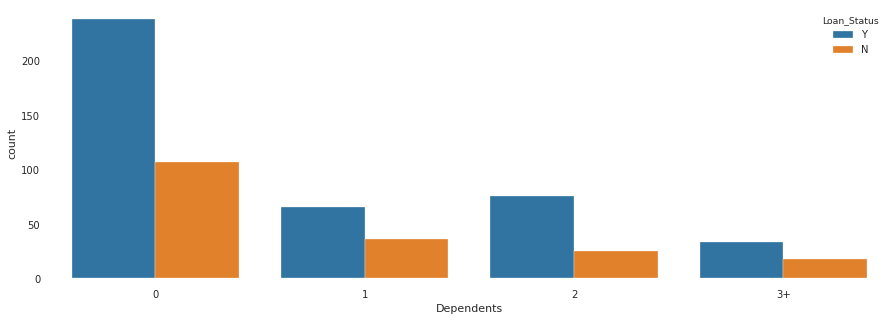

In [22]:
# Dependents

plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df);

# first if Dependents = 0 , we got higher chance to get a loan ((very hight chance))
# good feature

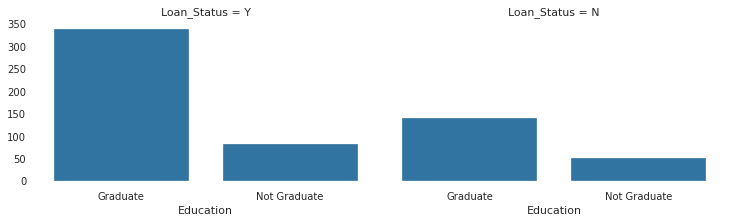

In [23]:
# Education

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');

# If you are graduated or not, you will get almost the same chance to get a loan (No pattern)
# Here you can see that most people did graduated, and most of them got a loan
# on the other hand, most of people who did't graduate also got a loan, but with less percentage from people who graduated

# not important feature

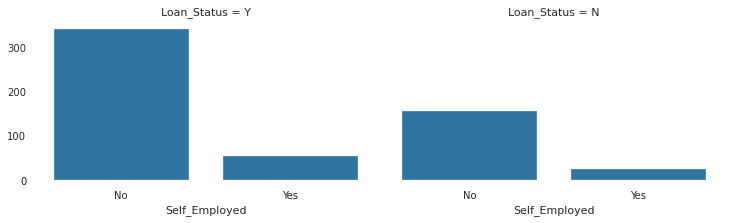

In [24]:
# Self_Employed

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed');

# No pattern (same as Education)

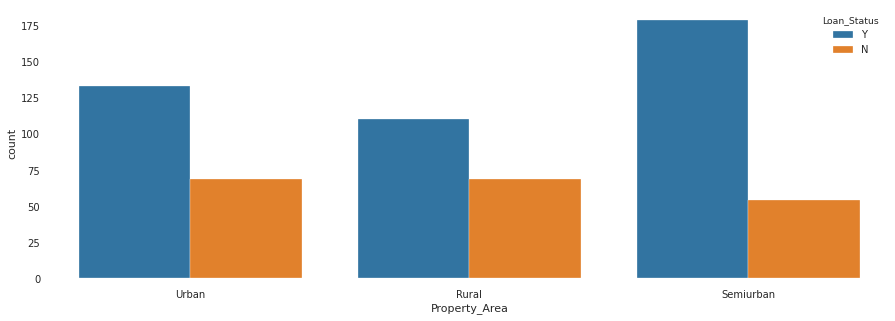

In [25]:
# Property_Area

plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);

# We can say, Semiurban Property_Area got more than 50% chance to get a loan

# good feature

### Correlation

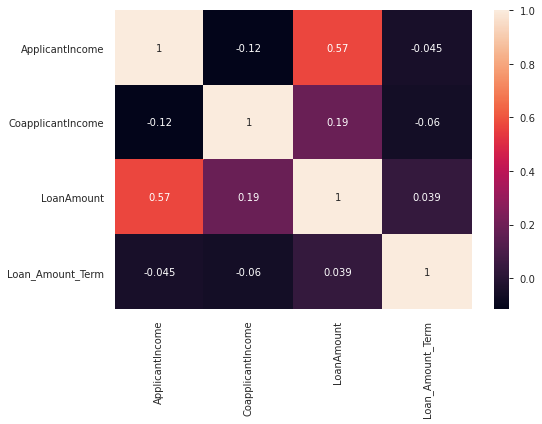

In [26]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### Processing our data

Missing values

In [27]:
df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

Let's separate the numerical columns from the categorical


In [28]:
cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [29]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [30]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [31]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [32]:
cat_data.isnull().sum()

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Credit_History    50
Property_Area      0
Loan_Status        0
dtype: int64

In [33]:
# If you want to fill every column with its own most frequent value you can use

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # no more missing data 

False

In [34]:
num_data.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
dtype: int64

In [35]:
# fill every missing value with their previous value in the same column

num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any() # no more missing data 

False

### Categorical columns


we are going to use LabelEncoder :

In [36]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [37]:
# transform the target column

target_values = {'Y': 0 , 'N' : 1}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [38]:
# transform other columns

for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [39]:
cat_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2
5,1,1,2,0,1,1,2
6,1,1,0,1,0,1,2
7,1,1,3,0,0,0,1
8,1,1,2,0,0,1,2
9,1,1,1,0,0,1,1


In [40]:
target.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

We can now contact our cat data, num data, and our target data

In [41]:
df = pd.concat([cat_data, num_data, target], axis=1)

In [42]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,0


### Train the data

In [43]:
X = pd.concat([cat_data,num_data],axis=1)
y = target

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [46]:
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)


### Using Logistic Regression

In [47]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [48]:
def metrics(y_true,y_pred,retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))
    

In [49]:
metrics(y_test,y_pred)

  pre: 0.652
  rec: 0.455
  f1: 0.536
  loss: 7.301
  acc: 0.789


### Using Decision Tree

In [50]:
tree = DecisionTreeClassifier(max_depth=2,random_state=42)

In [51]:
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)

In [52]:
metrics(y_test,y_pred_tree)

  pre: 0.875
  rec: 0.424
  f1: 0.571
  loss: 5.897
  acc: 0.829


### Using Random Forest

In [53]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
y_pred_forest = forest.predict(X_test)

In [54]:
metrics(y_test,y_pred_forest)

  pre: 0.682
  rec: 0.455
  f1: 0.545
  loss: 7.020
  acc: 0.797


In [55]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(forest.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
